In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
url = "https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/international-airline-passengers.csv"
df = pd.read_csv(url,skipfooter=2)
df.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


(144, 2)

In [6]:
df.head(3)

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [7]:
df.tail(3)

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [8]:
df.index = pd.to_datetime(df["Month"])
df.drop(['Month'],axis=1,inplace=True)
df.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
old_name = "International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60"
df.rename(columns={old_name:"Volume"},inplace=True)
df.head()

,Volume
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


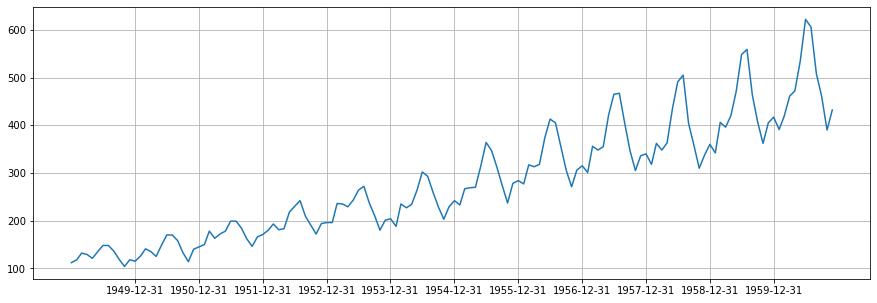

In [19]:
plt.figure(figsize=(15,5))
plt.plot(df['Volume'])
plt.grid(True)
dates = pd.date_range("1949-01-01","1960-12-01",freq='Y')
plt.xticks(dates)
plt.show()

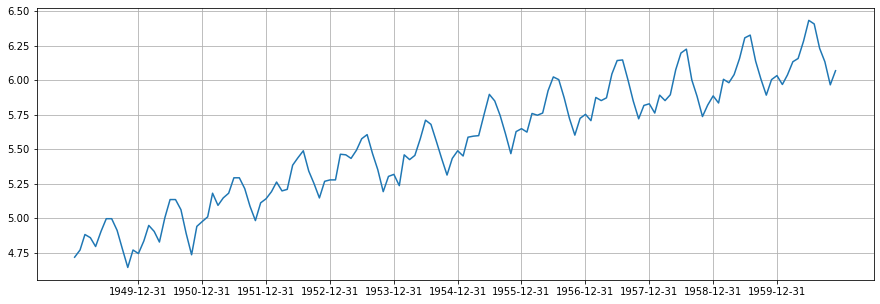

In [20]:
dflog = np.log(df['Volume'])
plt.figure(figsize=(15,5))
plt.plot(dflog)
plt.grid(True)
dates = pd.date_range("1949-01-01","1960-12-01",freq='Y')
plt.xticks(dates)
plt.show()

## test for stationarity

#### Dicky Fuller Test
    - Null Hypothesis - the data has trend, and it is not stationary
    - Alternate Hypothesis - the data has not trend, it is stationary
    
    
- if pvalue>0.05 = Null Hypothesis accepted, data has trend
- if pvalue<0.05 = Null Hypothesis rejected, data has no trend


In [22]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(dflog)
results

(-1.717017089106963,
 0.4223667747703902,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

In [24]:
df['log'] = dflog
df['diff-1'] = dflog - dflog.shift(1)
df.head(6)

,Volume,diff-1,log
Month,,,
1949-01-01,112,NaN,4.718499
1949-02-01,118,0.052186,4.770685
1949-03-01,132,0.112117,4.882802
1949-04-01,129,-0.022990,4.859812
1949-05-01,121,-0.064022,4.795791
1949-06-01,135,0.109484,4.905275


In [25]:
adfuller(df['diff-1'].dropna())

(-2.717130598388118,
 0.07112054815086118,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -440.35846985568094)

In [26]:
# for AR  - p = partial autocorrelation
# for MA - q - Autocorrelation

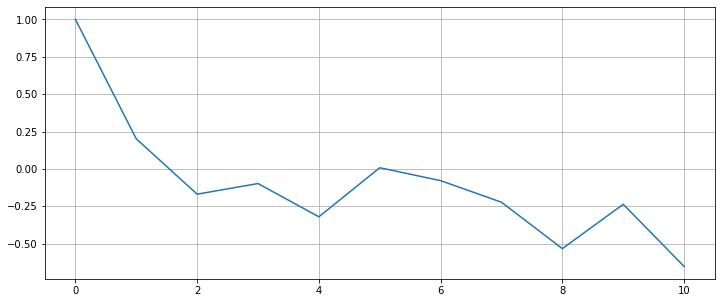

In [29]:
from statsmodels.tsa.stattools import acf,pacf

pac = pacf(df['diff-1'].dropna(),nlags=10)
plt.figure(figsize=(12,5))
plt.plot(pac)
plt.grid(True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


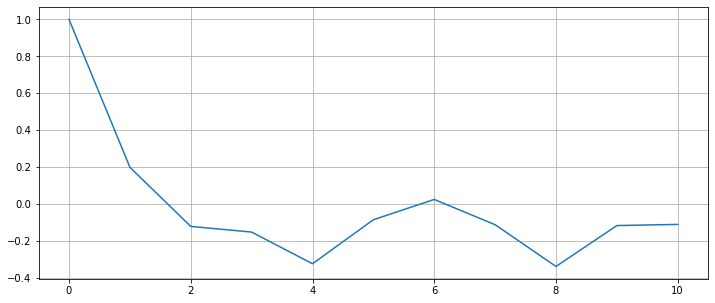

In [31]:
ac = acf(df['diff-1'].dropna(),nlags=10)
plt.figure(figsize=(12,5))
plt.plot(ac)
plt.grid(True)
plt.show()

# Apply ARIMA

In [33]:
from statsmodels.tsa.arima_model import ARIMA
arima_model = ARIMA(dflog,(2,1,2))
model = arima_model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


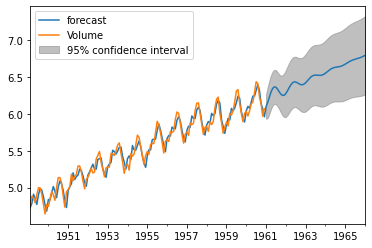

In [39]:
model.plot_predict(start=1,end=204)
plt.show()

In [37]:
forecast,error,confidence = model.forecast(steps=60)
np.exp(forecast)

array([443.87098316, 470.03824077, 504.93498288, 540.45479838,
       567.73066492, 580.32805251, 577.00260338, 561.93881235,
       542.38460422, 525.56670526, 516.65909594, 518.14324775,
       529.93713563, 549.71673994, 573.36063906, 595.78894753,
       612.33144697, 620.24243449, 619.5954569 , 613.03669041,
       604.59661029, 598.2663835 , 596.94847719, 601.96242312,
       612.98281955, 628.25996846, 645.07996999, 660.46211733,
       671.98839641, 678.50388435, 680.39645978, 679.34137021,
       677.65965113, 677.58623074, 680.69829135, 687.6111953 ,
       697.9368612 , 710.46202983, 723.5017721 , 735.36375621,
       744.81251605, 751.39213638, 755.49846104, 758.18783253,
       760.81237151, 764.62058732, 770.44244607, 778.52283381,
       788.51636144, 799.6246322 , 810.83626704, 821.21000931,
       830.12572957, 837.43167778, 843.44774622, 848.83399401,
       854.37746222, 860.76867336, 868.42975101, 877.4308159 ])

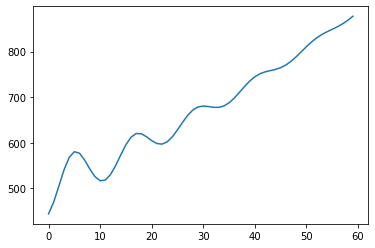

In [50]:
plt.plot(np.exp(forecast))
plt.show()

# SARIMAX

In [45]:
from statsmodels.tsa.statespace import sarimax
s_model = sarimax.SARIMAX(dflog,order=(2,1,0),seasonal_order=(1,1,0,12))
model = s_model.fit()

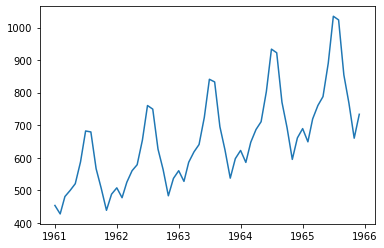

In [49]:
plt.plot(np.exp(model.forecast(steps=60)))